<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/analytics-workbench/fatores_sociodemografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

**Integrantes**
- Larissa Yumi Tinem
- Leo Tsuchida Hoçoya

**Conteúdo**
- Análise da influência das variáveis IDADE, SEXO, RAÇA/COR e MUNICÍPIO DE RESIDÊNCIA sobre a quantidade de internações.

**Histórico de alterações:**
- 12/11/2025 - Larissa Yumi Tinem - Análise da influência de variáveis



# **Fatores que influenciam as internações psiquiátricas**

A análise de internações psiquiátricas pode revelar importantes padrões sobre quem mais utiliza os serviços de saúde mental. Entre os principais fatores considerados estão a idade, o sexo e a raça/cor dos pacientes, que ajudam a identificar grupos mais expostos a vulnerabilidades, diferenças de acesso ao tratamento e possíveis desigualdades na rede de atenção. A partir desses indicadores, torna-se possível compreender melhor a distribuição das internações e orientar políticas públicas mais eficientes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataframes/df_tratado.csv")
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC',
       'IDADE', 'SEXO', 'RACA_COR', 'ESPEC', 'IDENT', 'MUNIC_RES',
       'DIAG_PRINC', 'DIAG_SECUN', 'CAR_INT', 'COBRANCA', 'MUNIC_MOV',
       'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'DT_INTER', 'DT_SAIDA',
       'QT_DIARIAS', 'DIAS_PERM', 'MORTE', 'ANO'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')


# **Influência da Idade**

Os dados foram agrupados por faixas etárias para criar a coluna FAIXA_IDADE. Em seguida, contou-se o número de internações em cada faixa e a coluna resultante foi renomeada para TOTAL_INTER, fornecendo uma visão resumida da distribuição etária dos pacientes internados.

### **Resultado analisado**
- A faixa etária de 31 a 49 anos apresentou o maior número de internações em comparação com as demais faixas, o que pode indicar maior exposição a fatores de risco ou maior prevalência de condições de saúde nessa fase da vida.
- Além disso, trata-se da população economicamente ativa, ou seja, um grupo em que se espera que a maioria esteja inserida no mercado de trabalho. Isso pode refletir o impacto de fatores ocupacionais, estresse laboral e pressões socioeconômicas na saúde mental.

In [ ]:
import pandas as pd

# Criar faixas etárias de exemplo
bins = [0, 17, 30, 49, 64, 79, 99]
labels = ['0-17','18-30','31-49','50-64','65-79','80-99']
df['FAIXA_IDADE'] = pd.cut(df['IDADE'], bins=bins, labels=labels, right=True)

# Somar internações por faixa etária
idade_totais = df.groupby('FAIXA_IDADE')['CAR_INT'].count().reset_index()
idade_totais.rename(columns={'CAR_INT': 'TOTAL_INTER'}, inplace=True)
print(idade_totais)


  FAIXA_IDADE  TOTAL_INTER
0        0-17         9012
1       18-30        65504
2       31-49       117760
3       50-64        54728
4       65-79        15622
5       80-99         3094


/tmp/ipython-input-3174007006.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_totais = df.groupby('FAIXA_IDADE')['CAR_INT'].count().reset_index()


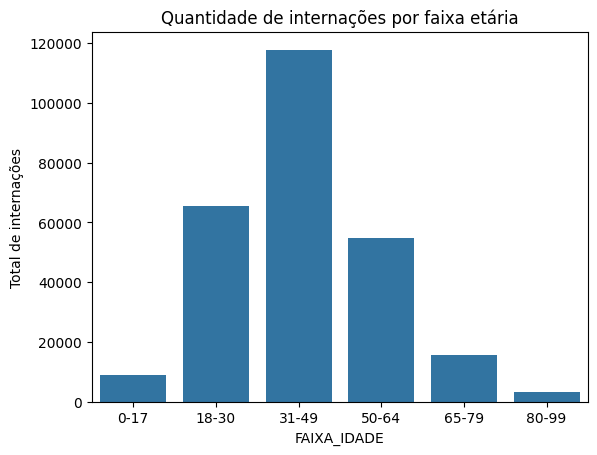

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='FAIXA_IDADE', y='TOTAL_INTER', data=idade_totais)
plt.title('Quantidade de internações por faixa etária')
plt.ylabel('Total de internações')
plt.show()


# **Internação por Sexo**

Para analisar a distribuição das internações entre homens e mulheres, os dados foram agrupados pela variável SEXO, contabilizando o total de internações em cada categoria. Esse processamento gerou uma visão geral de como os casos se distribuem entre os dois grupos.

### **Resultados analisados:**

- Observou-se que homens apresentam um número maior de internações em comparação com as mulheres.

- Esse padrão pode estar relacionado a fatores como menor procura espontânea por serviços de saúde mental, maior exposição a comportamentos de risco, e barreiras culturais que dificultam que homens busquem ajuda precocemente, o que pode resultar em quadros mais graves e, consequentemente, maior necessidade de internação.

        SEXO  TOTAL_INTER
0   Feminino       104064
1  Masculino       161688


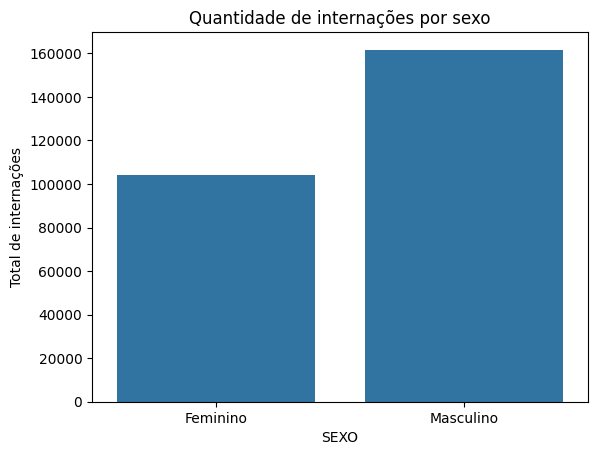

In [ ]:
sexo_totais = df.groupby('SEXO')['CAR_INT'].count().reset_index()
sexo_totais.rename(columns={'CAR_INT': 'TOTAL_INTER'}, inplace=True)
print(sexo_totais)

sns.barplot(x='SEXO', y='TOTAL_INTER', data=sexo_totais)
plt.title('Quantidade de internações por sexo')
plt.ylabel('Total de internações')
plt.show()


# **Internação por Raça/Cor**

Para entender como as internações psiquiátricas se distribuem entre diferentes grupos raciais, os dados foram agrupados pela variável RACA_COR, somando o total de internações em cada categoria. Depois, os valores foram ordenados do maior para o menor para facilitar a visualização das diferenças entre os grupos.

**Resultados analisados**

- O grupo branco apresentou o maior número de internações psiquiátricas.

- Em seguida, aparecem pardos e pretos, respectivamente, com números menores, mas ainda expressivos.

- Essa diferença pode estar relacionada tanto à distribuição populacional quanto a desigualdades no acesso aos serviços, condições socioeconômicas e barreiras estruturais que impactam cada grupo de forma distinta.

    RACA_COR  TOTAL_INTER
1     Branca       145922
4      Parda        85945
5      Preta        24694
2   Ignorado         7678
0    Amarela         1477
3  IndÃ­gena           36


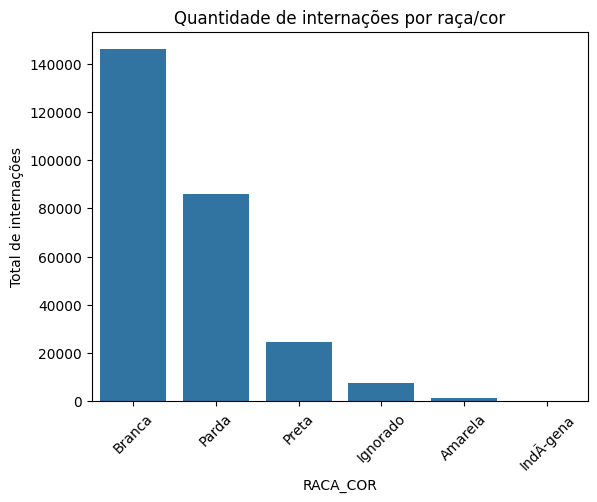

In [ ]:
raca_totais = df.groupby('RACA_COR')['CAR_INT'].count().reset_index()
raca_totais.rename(columns={'CAR_INT': 'TOTAL_INTER'}, inplace=True)
raca_totais = raca_totais.sort_values(by='TOTAL_INTER', ascending=False)
print(raca_totais)

sns.barplot(x='RACA_COR', y='TOTAL_INTER', data=raca_totais)
plt.title('Quantidade de internações por raça/cor')
plt.ylabel('Total de internações')
plt.xticks(rotation=45)
plt.show()


# **Internação por Município**

Para identificar quais municípios concentram o maior número de internações psiquiátricas, os dados foram agrupados pela variável MUNIC_RES, contabilizando o total de internações de cada cidade. Em seguida, os municípios foram ordenados de forma decrescente, e selecionamos apenas os 10 com maiores valores, facilitando a visualização da distribuição geográfica das internações.

### **Resultado analisado**

- A cidade de São Paulo (código IBGE 355030) apresenta, de longe, o maior número de internações com mais de 50 mil registros, o que é esperado considerando que é o município mais populoso e possui a maior rede de serviços de saúde do estado.

- Em segundo lugar aparece São José do Rio Preto (código IBGE 354980), que também se destaca como polo regional de saúde e costuma receber pacientes de cidades vizinhas, o que contribui para seus números elevados.


     MUNIC_RES  TOTAL_INTER
761     355030        51975
755     354980         7163
371     351518         5703
526     352900         5058
756     354990         5002
687     354340         3948
385     351620         3923
323     351080         3800
664     354140         3798
308     350950         3371


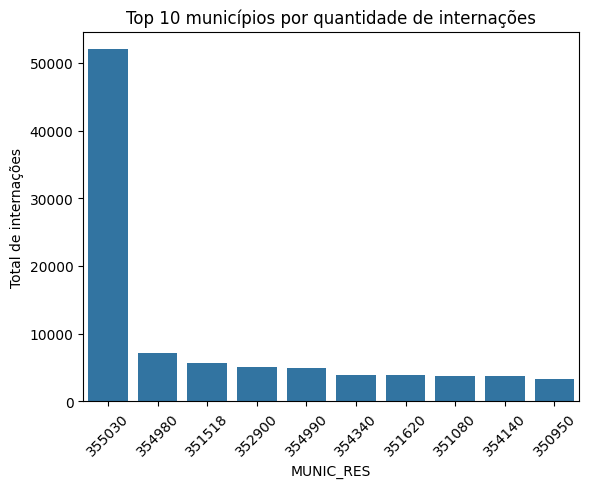

In [ ]:
municipio_totais = df.groupby('MUNIC_RES')['CAR_INT'].count().reset_index()
municipio_totais.rename(columns={'CAR_INT': 'TOTAL_INTER'}, inplace=True)
municipio_totais = municipio_totais.sort_values(by='TOTAL_INTER', ascending=False).head(10)
print(municipio_totais)

sns.barplot(
    x='MUNIC_RES',
    y='TOTAL_INTER',
    data=municipio_totais,
    order=municipio_totais['MUNIC_RES']  # mantém a ordem decrescente no eixo X
)

plt.title('Top 10 municípios por quantidade de internações')
plt.ylabel('Total de internações')
plt.xticks(rotation=45)
plt.show()